In [1]:
import xarray as xr
import sarxarray
import numpy as np
from pathlib import Path

import dask
dask.config.set(scheduler='synchronous')

In [ ]:
slcs = xr.open_zarr('slc_img_stack.zarr')
slcs_out = slcs.drop_encoding()
slcs_out = slcs_out.chunk({'azimuth': 2000, 'range': 4000, 'time': 20})
slcs_out.to_zarr('slc_img_stack2.zarr', mode='w')

In [2]:
slcs = xr.open_zarr('slc_img_stack.zarr')
slcs = slcs.slcstack._get_amplitude()
slcs

<xarray.Dataset> Size: 39GB
Dimensions:    (azimuth: 2000, range: 4000, time: 409)
Coordinates:
  * azimuth    (azimuth) int64 16kB 7000 7001 7002 7003 ... 8996 8997 8998 8999
  * range      (range) int64 32kB 31000 31001 31002 31003 ... 34997 34998 34999
  * time       (time) datetime64[ns] 3kB 2014-12-19 2014-12-31 ... 2023-10-09
Data variables:
    complex    (azimuth, range, time) complex64 26GB dask.array<chunksize=(2000, 4000, 20), meta=np.ndarray>
    lat        (azimuth, range) float32 32MB dask.array<chunksize=(2000, 4000), meta=np.ndarray>
    lon        (azimuth, range) float32 32MB dask.array<chunksize=(2000, 4000), meta=np.ndarray>
    amplitude  (azimuth, range, time) float32 13GB dask.array<chunksize=(2000, 4000, 20), meta=np.ndarray>

In [3]:
slcs['time']

<xarray.DataArray 'time' (time: 409)> Size: 3kB
array(['2014-12-19T00:00:00.000000000', '2014-12-31T00:00:00.000000000',
       '2015-02-05T00:00:00.000000000', ..., '2023-09-15T00:00:00.000000000',
       '2023-09-27T00:00:00.000000000', '2023-10-09T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 3kB 2014-12-19 2014-12-31 ... 2023-10-09

In [4]:
mrm = slcs.slcstack.mrm().compute()

/home/oku/miniforge3/envs/pydepsi-dev/lib/python3.12/site-packages/sarxarray/stack.py:34: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  t_order = list(self._obj.dims.keys()).index("time")  # Time dimension order


(np.float64(34999.5),
 np.float64(30999.5),
 np.float64(8999.5),
 np.float64(6999.5))

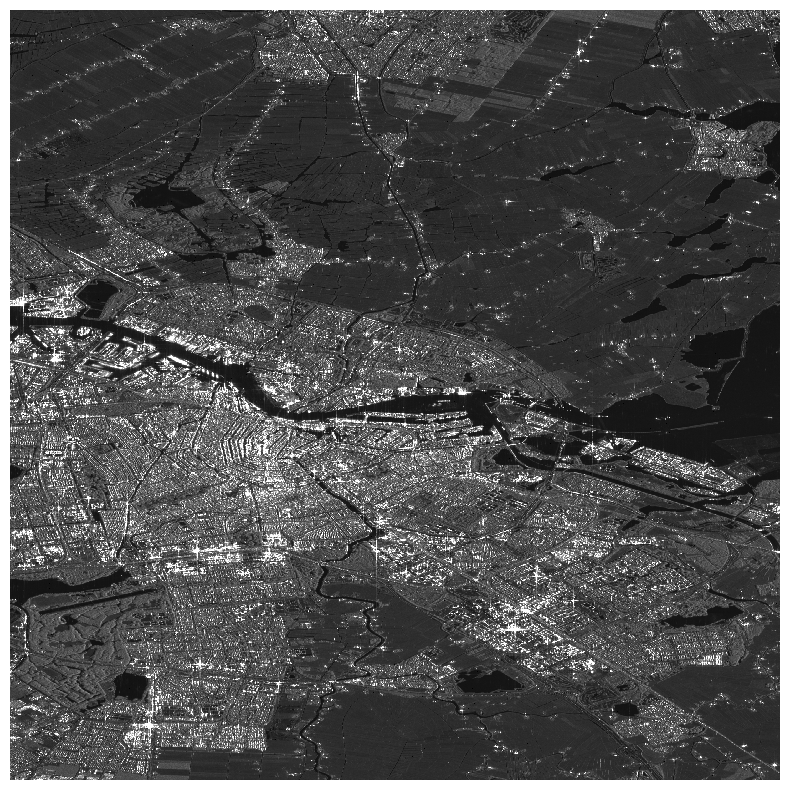

In [5]:
# Visualize
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches((10,10))
im = mrm.plot(ax=ax, robust=True, cmap='gray', add_colorbar=False, xincrease=False, yincrease=False)
ax.set_aspect(2)
im.set_clim([0, 300])
ax.axis('off')